Data visualization Heart disease

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

final_data = pd.concat([df1, df2], axis=1)

final_data.to_csv('final_data.csv', index=False)
print('Data saved to final_data.csv')

Data saved to final_data.csv


In [23]:
df = pd.read_csv('final_data.csv')

In [28]:
df.describe()


,Age,Sex,Chest_Pain_Type,Resting_BP,Cholestétol,Glycémia,Resting_ECG,Max_heart_Rate_achived,angina_exercice_induced,oldpeak,slp,Number_major_vessels,thall,output,98.6
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


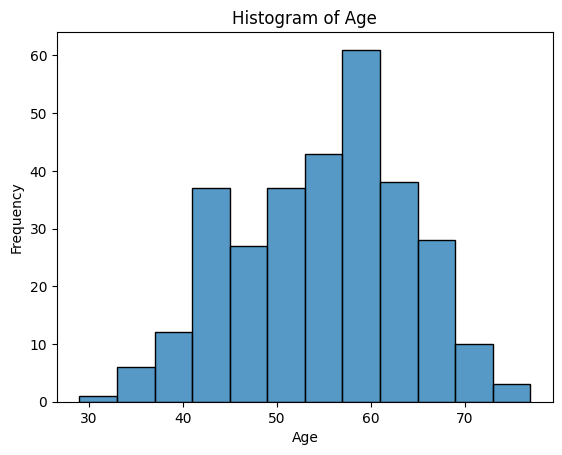

In [18]:
import seaborn as sns

sns.histplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Histogram of Age')
plt.show()

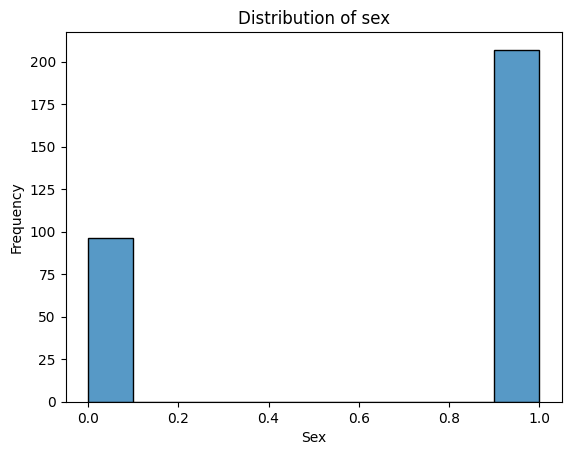

In [13]:
sns.histplot(df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Frequency') 
plt.title('Distribution of sex')
plt.show()


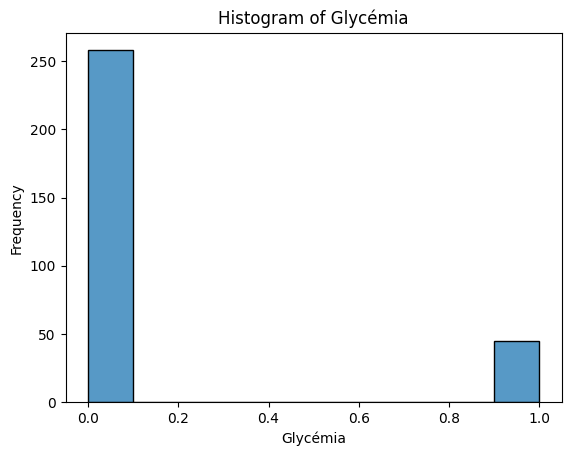

In [19]:
sns.histplot(df['Glycémia'])
plt.xlabel('Glycémia')  
plt.ylabel('Frequency') 
plt.title('Histogram of Glycémia')
plt.show()


In [20]:
sns.histplot(df['Cholesterol'])
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.show()

KeyError: 'Cholesterol'